In [2]:
from google.colab import files
uploaded = files.upload()

Saving course_project_test.csv to course_project_test.csv
Saving course_project_train.csv to course_project_train.csv
Saving HW_regression.ipynb to HW_regression.ipynb


In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.metrics import f1_score, classification_report, precision_recall_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

RANDOM_STATE = 42
TARGET = "Credit Default"

In [15]:
# БЛОК 1. Сбор данных (загрузка)


train_path = "course_project_train.csv"
train = pd.read_csv(train_path)

# Если есть тестовый файл:
test_path = "course_project_test.csv"
test = pd.read_csv(test_path)

print("TRAIN SHAPE:", train.shape)
print("COLUMNS:", list(train.columns))
train.head()

TRAIN SHAPE: (7500, 17)
COLUMNS: ['Home Ownership', 'Annual Income', 'Years in current job', 'Tax Liens', 'Number of Open Accounts', 'Years of Credit History', 'Maximum Open Credit', 'Number of Credit Problems', 'Months since last delinquent', 'Bankruptcies', 'Purpose', 'Term', 'Current Loan Amount', 'Current Credit Balance', 'Monthly Debt', 'Credit Score', 'Credit Default']


,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
0,Own Home,482087.0,NaN,0.0,11.0,26.3,685960.0,1.0,NaN,1.0,debt consolidation,Short Term,99999999.0,47386.0,7914.0,749.0,0
1,Own Home,1025487.0,10+ years,0.0,15.0,15.3,1181730.0,0.0,NaN,0.0,debt consolidation,Long Term,264968.0,394972.0,18373.0,737.0,1
2,Home Mortgage,751412.0,8 years,0.0,11.0,35.0,1182434.0,0.0,NaN,0.0,debt consolidation,Short Term,99999999.0,308389.0,13651.0,742.0,0
3,Own Home,805068.0,6 years,0.0,8.0,22.5,147400.0,1.0,NaN,1.0,debt consolidation,Short Term,121396.0,95855.0,11338.0,694.0,0
4,Rent,776264.0,8 years,0.0,13.0,13.6,385836.0,1.0,NaN,0.0,debt consolidation,Short Term,125840.0,93309.0,7180.0,719.0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Home Ownership                7500 non-null   object 
 1   Annual Income                 5943 non-null   float64
 2   Years in current job          7129 non-null   object 
 3   Tax Liens                     7500 non-null   float64
 4   Number of Open Accounts       7500 non-null   float64
 5   Years of Credit History       7500 non-null   float64
 6   Maximum Open Credit           7500 non-null   float64
 7   Number of Credit Problems     7500 non-null   float64
 8   Months since last delinquent  3419 non-null   float64
 9   Bankruptcies                  7486 non-null   float64
 10  Purpose                       7500 non-null   object 
 11  Term                          7500 non-null   object 
 12  Current Loan Amount           7500 non-null   float64
 13  Cur

None

,na_share,na_cnt
Annual Income,0.207600,1557
Bankruptcies,0.001867,14
Credit Default,0.000000,0
Credit Score,0.207600,1557
Current Credit Balance,0.000000,0
Current Loan Amount,0.000000,0
Home Ownership,0.000000,0
Maximum Open Credit,0.000000,0
Monthly Debt,0.000000,0
Months since last delinquent,0.544133,4081


,proportion
Credit Default,
0,0.718267
1,0.281733


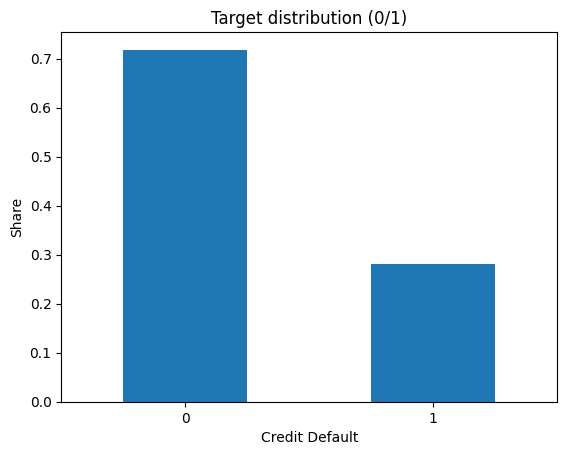

,count,mean,std,min,25%,50%,75%,max
Annual Income,5943.0,1.366392e+06,8.453392e+05,164597.0,844341.0,1168386.0,1640137.00,1.014934e+07
Tax Liens,7500.0,3.013333e-02,2.716035e-01,0.0,0.0,0.0,0.00,7.000000e+00
Number of Open Accounts,7500.0,1.113093e+01,4.908924e+00,2.0,8.0,10.0,14.00,4.300000e+01
Years of Credit History,7500.0,1.831747e+01,7.041946e+00,4.0,13.5,17.0,21.80,5.770000e+01
Maximum Open Credit,7500.0,9.451537e+05,1.602622e+07,0.0,279229.5,478159.0,793501.50,1.304726e+09
Number of Credit Problems,7500.0,1.700000e-01,4.985978e-01,0.0,0.0,0.0,0.00,7.000000e+00
Months since last delinquent,3419.0,3.469260e+01,2.168881e+01,0.0,16.0,32.0,50.00,1.180000e+02
Bankruptcies,7486.0,1.171520e-01,3.471917e-01,0.0,0.0,0.0,0.00,4.000000e+00
Current Loan Amount,7500.0,1.187318e+07,3.192612e+07,11242.0,180169.0,309573.0,519882.00,1.000000e+08
Current Credit Balance,7500.0,2.898332e+05,3.178714e+05,0.0,114256.5,209323.0,360406.25,6.506797e+06


,nunique
Purpose,15
Years in current job,12
Home Ownership,4
Term,2


In [9]:
# БЛОК 2. EDA-анализ


# 1) Общая информация
display(train.info())

# 2) Пропуски
na_share = train.isna().mean().sort_values(ascending=False)
display(pd.DataFrame({"na_share": na_share, "na_cnt": train.isna().sum()}))

# 3) Распределение таргета
target_rate = train[TARGET].value_counts(normalize=True)
display(target_rate)

plt.figure()
target_rate.sort_index().plot(kind="bar")
plt.xticks(rotation=0)
plt.title("Target distribution (0/1)")
plt.xlabel("Credit Default")
plt.ylabel("Share")
plt.show()

# 4) Быстрый взгляд на числовые признаки
num_cols = train.drop(columns=[TARGET]).select_dtypes(include=["int64", "float64"]).columns.tolist()
display(train[num_cols].describe().T)

# 5) Категориальные признаки и их кардинальность
cat_cols = train.drop(columns=[TARGET]).select_dtypes(include=["object", "category"]).columns.tolist()
card = {c: train[c].nunique(dropna=False) for c in cat_cols}
display(pd.DataFrame({"nunique": card}).sort_values("nunique", ascending=False))

In [10]:
# БЛОК 3. Preprocessing + FE


df = train.copy()

# Разделим признаки/таргет
X = df.drop(columns=[TARGET])
y = df[TARGET].astype(int)

# ---- FE-1: Years in current job -> числовой вид ----
def parse_years_in_job(s: pd.Series) -> pd.Series:
    """
    Превращает строки вида:
      '10+ years' -> 10
      '< 1 year'  -> 0
      '3 years'   -> 3
      '1 year'    -> 1
      NaN         -> NaN
    """
    s = s.astype("object")
    out = s.copy()

    # нормализуем формат
    out = out.replace({"10+ years": "10", "< 1 year": "0"})
    out = out.str.replace(" years", "", regex=False)
    out = out.str.replace(" year", "", regex=False)

    # в число
    return pd.to_numeric(out, errors="coerce")

# ---- FE-2: Term (если строка вида 'Short Term'/'Long Term') -> бинарный признак ----
def map_term(s: pd.Series) -> pd.Series:
    """
    Часто Term бывает: 'Short Term' / 'Long Term'
    Сделаем: Short=0, Long=1, иначе NaN
    """
    s = s.astype("object")
    return s.map({"Short Term": 0, "Long Term": 1})

# ---- FE-3: Пропуск в Months since last delinquent как отдельный индикатор ----
def add_delinquent_features(df_in: pd.DataFrame) -> pd.DataFrame:
    """
    Добавляет:
      - is_delinquent_missing: 1 если Months since last delinquent пропущен
    """
    df_out = df_in.copy()
    col = "Months since last delinquent"
    if col in df_out.columns:
        df_out["is_delinquent_missing"] = df_out[col].isna().astype(int)
    return df_out

# Применяем FE к X (без утечки: это только детерминированные преобразования)
X = add_delinquent_features(X)

# Обновим списки колонок (после добавления is_delinquent_missing)
num_cols = X.select_dtypes(include=["int64", "float64"]).columns.tolist()
cat_cols = X.select_dtypes(include=["object", "category"]).columns.tolist()

# Специально обрабатываем некоторые колонки, которые сейчас object, но должны стать числом
SPECIAL_NUM_FROM_TEXT = ["Years in current job"]
SPECIAL_TERM = ["Term"]

# Уберём их из cat_cols (мы превратим в числа внутри пайплайна)
for c in SPECIAL_NUM_FROM_TEXT + SPECIAL_TERM:
    if c in cat_cols:
        cat_cols.remove(c)

# --- Трансформеры для "особых" колонок ---
years_job_transformer = Pipeline(steps=[
    # берём Series и возвращаем DataFrame (2D)
    ("extract", FunctionTransformer(lambda df_: parse_years_in_job(df_.iloc[:, 0]).to_frame(),
                                    validate=False)),
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler()),
])

term_transformer = Pipeline(steps=[
    ("extract", FunctionTransformer(lambda df_: map_term(df_.iloc[:, 0]).to_frame(),
                                    validate=False)),
    ("imputer", SimpleImputer(strategy="most_frequent")),
])

# --- Числовые признаки: импутация + скейл ---
numeric_pipe = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

# --- Категориальные признаки: импутация + OHE ---
categorical_pipe = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("ohe", OneHotEncoder(handle_unknown="ignore"))
])

# --- Общий препроцессор ---
preprocess = ColumnTransformer(
    transformers=[
        ("num", numeric_pipe, num_cols),
        ("cat", categorical_pipe, cat_cols),
        ("years_job", years_job_transformer, ["Years in current job"]),
        ("term", term_transformer, ["Term"]),
    ],
    remainder="drop"
)

In [11]:
# БЛОК 4. Baseline модель + валидация + подбор threshold под F1


X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y
)

baseline = Pipeline(steps=[
    ("prep", preprocess),
    ("clf", LogisticRegression(max_iter=2000, class_weight="balanced", random_state=RANDOM_STATE))
])

baseline.fit(X_train, y_train)

# Предсказания при стандартном пороге 0.5
pred_05 = baseline.predict(X_valid)
f1_05 = f1_score(y_valid, pred_05, pos_label=1)
print("Baseline F1 @ 0.5 =", f1_05)
print(classification_report(y_valid, pred_05))

# Подбор порога по Precision-Recall кривой
proba = baseline.predict_proba(X_valid)[:, 1]
thresholds = np.linspace(0.05, 0.95, 181)

best_t, best_f1 = 0.5, -1
for t in thresholds:
    pred_t = (proba >= t).astype(int)
    f1 = f1_score(y_valid, pred_t, pos_label=1)
    if f1 > best_f1:
        best_f1 = f1
        best_t = t

print("Best threshold =", best_t)
print("Best F1 =", best_f1)

Baseline F1 @ 0.5 = 0.5140562248995983
              precision    recall  f1-score   support

           0       0.82      0.71      0.76      1077
           1       0.45      0.61      0.51       423

    accuracy                           0.68      1500
   macro avg       0.63      0.66      0.64      1500
weighted avg       0.71      0.68      0.69      1500

Best threshold = 0.4099999999999999
Best F1 = 0.537618699780862


In [12]:
# БЛОК 5. Подбор модели/гиперпараметров + кросс-валидация


# 1) Кандидаты: LogisticRegression и RandomForest
pipe_lr = Pipeline(steps=[
    ("prep", preprocess),
    ("clf", LogisticRegression(max_iter=4000, class_weight="balanced", random_state=RANDOM_STATE))
])

pipe_rf = Pipeline(steps=[
    ("prep", preprocess),
    ("clf", RandomForestClassifier(
        n_estimators=500,
        random_state=RANDOM_STATE,
        class_weight="balanced_subsample",
        n_jobs=-1
    ))
])

# 2) Параметры для подбора
param_grid_lr = {
    "clf__C": [0.1, 0.3, 1.0, 3.0, 10.0],
    "clf__penalty": ["l2"],
    "clf__solver": ["lbfgs"],
}

param_grid_rf = {
    "clf__max_depth": [None, 6, 10, 14],
    "clf__min_samples_split": [2, 10, 30],
    "clf__min_samples_leaf": [1, 5, 15],
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)

# 3) GridSearch под F1 по классу 1 (в sklearn f1 — это positive class по умолчанию, если метки 0/1)
gs_lr = GridSearchCV(pipe_lr, param_grid_lr, scoring="f1", cv=cv, n_jobs=-1, verbose=1)
gs_rf = GridSearchCV(pipe_rf, param_grid_rf, scoring="f1", cv=cv, n_jobs=-1, verbose=1)

gs_lr.fit(X, y)
gs_rf.fit(X, y)

print("Best LR CV F1:", gs_lr.best_score_)
print("Best LR params:", gs_lr.best_params_)
print("Best RF CV F1:", gs_rf.best_score_)
print("Best RF params:", gs_rf.best_params_)

best_model = gs_lr.best_estimator_ if gs_lr.best_score_ >= gs_rf.best_score_ else gs_rf.best_estimator_
print("Selected model:", type(best_model.named_steps["clf"]).__name__)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best LR CV F1: 0.5327747633030349
Best LR params: {'clf__C': 10.0, 'clf__penalty': 'l2', 'clf__solver': 'lbfgs'}
Best RF CV F1: 0.5449139265982481
Best RF params: {'clf__max_depth': 10, 'clf__min_samples_leaf': 5, 'clf__min_samples_split': 30}
Selected model: RandomForestClassifier


In [13]:
# БЛОК 6. Финал: порог + обучение на всем train


# Для честного подбора порога снова делаем holdout
X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y
)

best_model.fit(X_train, y_train)
proba = best_model.predict_proba(X_valid)[:, 1]

thresholds = np.linspace(0.05, 0.95, 181)
best_t, best_f1 = 0.5, -1
for t in thresholds:
    f1 = f1_score(y_valid, (proba >= t).astype(int), pos_label=1)
    if f1 > best_f1:
        best_f1, best_t = f1, t

print("FINAL threshold:", best_t)
print("FINAL F1 on holdout:", best_f1)

# Обучаем финальную модель на всех данных
best_model.fit(X, y)

FINAL threshold: 0.4749999999999999
FINAL F1 on holdout: 0.5547169811320755


Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Annual Income', 'Tax Liens',
                                                   'Number of Open Accounts',
                                                   'Years of Credit History',
                                                   'Maximum Open Credit',
                                                   'Number of Credit Problems',
                                                   'Months since last '
                                                   'delinquent',
                                                   'Bankruptcies',
                                                   'Current Loan Amount',
                                                   'Current Credi...
                                                  ['Years in current job']),
                                                 ('term',
                                                  Pipeline(steps=[('extract',
                                                                   FunctionTransformer(func=<function <lambda> at 0x7e24f5dc3560>)),
                                                                  ('imputer',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  ['Term'])])),
                ('clf',
                 RandomForestClassifier(class_weight='balanced_subsample',
                                        max_depth=10, min_samples_leaf=5,
                                        min_samples_split=30, n_estimators=500,
                                        n_jobs=-1, random_state=42))])

In [16]:
# БЛОК 7. Прогноз на тестовом датасете


test = add_delinquent_features(test)
test_proba = best_model.predict_proba(test)[:, 1]
test_pred = (test_proba >= best_t).astype(int)

submission = pd.DataFrame({
    TARGET: test_pred
})
submission.to_csv("submission.csv", index=False)
submission.head()

,Credit Default
0,1
1,1
2,1
3,0
4,0


In [17]:
# БЛОК 8. Самописная Logistic Regression (Gradient Descent)


from scipy import sparse

class MyLogRegGD:
    """
    Самописная логистическая регрессия:
    - batch gradient descent
    - поддержка sparse матриц (после OHE обычно sparse)
    - L2-регуляризация (опционально)
    """
    def __init__(self, lr=0.1, n_iter=5000, l2=1e-4, fit_intercept=True, random_state=42):
        self.lr = lr
        self.n_iter = n_iter
        self.l2 = l2
        self.fit_intercept = fit_intercept
        self.random_state = random_state
        self.w_ = None

    @staticmethod
    def _sigmoid(z):
        z = np.clip(z, -35, 35)
        return 1.0 / (1.0 + np.exp(-z))

    def _add_intercept(self, X):
        if not self.fit_intercept:
            return X
        n = X.shape[0]
        if sparse.issparse(X):
            ones = sparse.csr_matrix(np.ones((n, 1)))
            return sparse.hstack([ones, X], format="csr")
        return np.hstack([np.ones((n, 1)), X])

    def fit(self, X, y):
        y = np.asarray(y).astype(float)
        Xb = self._add_intercept(X)

        rng = np.random.default_rng(self.random_state)
        self.w_ = rng.normal(0, 0.01, size=Xb.shape[1])

        for _ in range(self.n_iter):
            z = Xb @ self.w_
            p = self._sigmoid(np.asarray(z).ravel())

            # grad = X^T (p - y) / n
            diff = (p - y)
            grad = (Xb.T @ diff) / Xb.shape[0]
            grad = np.asarray(grad).ravel()

            # L2 (bias не регуляризуем)
            if self.l2 > 0:
                reg = self.l2 * self.w_
                if self.fit_intercept:
                    reg[0] = 0.0
                grad += reg

            self.w_ -= self.lr * grad

        return self

    def predict_proba(self, X):
        Xb = self._add_intercept(X)
        z = Xb @ self.w_
        p1 = self._sigmoid(np.asarray(z).ravel())
        return np.vstack([1 - p1, p1]).T

    def predict(self, X, threshold=0.5):
        return (self.predict_proba(X)[:, 1] >= threshold).astype(int)

In [18]:
# БЛОК 9. Сравнение MyLogRegGD vs sklearn.LogisticRegression


# 1) Сделаем holdout
X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y
)

# 2) Фитим preprocess ТОЛЬКО на train (без утечки)
prep = preprocess.fit(X_train, y_train)
Xtr_p = prep.transform(X_train)
Xval_p = prep.transform(X_valid)

# 3) sklearn логрег
sk = LogisticRegression(max_iter=4000, class_weight="balanced", random_state=RANDOM_STATE)
sk.fit(Xtr_p, y_train)
sk_proba = sk.predict_proba(Xval_p)[:, 1]

# 4) самописная логрег
my = MyLogRegGD(lr=0.1, n_iter=7000, l2=1e-4, fit_intercept=True, random_state=RANDOM_STATE)
my.fit(Xtr_p, y_train)
my_proba = my.predict_proba(Xval_p)[:, 1]

# 5) Функция подбора порога под F1
def best_threshold_for_f1(y_true, proba):
    thresholds = np.linspace(0.05, 0.95, 181)
    best_t, best_f1 = 0.5, -1
    for t in thresholds:
        f1 = f1_score(y_true, (proba >= t).astype(int), pos_label=1)
        if f1 > best_f1:
            best_f1, best_t = f1, t
    return best_t, best_f1

sk_t, sk_f1 = best_threshold_for_f1(y_valid, sk_proba)
my_t, my_f1 = best_threshold_for_f1(y_valid, my_proba)

print("SKLearn LogisticRegression: best_t =", sk_t, "best_f1 =", sk_f1)
print("MyLogRegGD               : best_t =", my_t, "best_f1 =", my_f1)

SKLearn LogisticRegression: best_t = 0.4099999999999999 best_f1 = 0.537618699780862
MyLogRegGD               : best_t = 0.22999999999999998 best_f1 = 0.5283018867924528
